In [1]:
import pandas as pd

In [2]:
id = []
first_name = []
last_name = []
party = []
state = []
district =[]
gender = []
date_of_birth = []
url = []
twitter_account = []

In [3]:
import json
import requests
import api_keys as AK

def proAPI():
	api_key  = AK.api_key 
	#url = "https://api.propublica.org/congress/v1/115/senate/members.json"
	# get recent bills
	url = "https://api.propublica.org/congress/v1/115/house/members.json"
	r = requests.get(url,headers={"X-API-KEY":"Y4RTSJ8OEX4OAApedLDU4wwq2rLlSp36ln6eJXs1"})
	return r.content
	#return r.content

def print_data(data):
	r = json.loads(data)
	members = r['results'][0]['members']
	for i in range(len(members)):
		id.append(members[i]['id'])
#		print(members[i]['id'])
		first_name.append(members[i]['first_name'])
		last_name.append(members[i]['last_name'])
		party.append(members[i]['party'])
		state.append(members[i]['state'])
		district.append(members[i]['district'])
		gender.append(members[i]['gender'])
		date_of_birth.append(members[i]['date_of_birth'])
		twitter_account.append(members[i]['twitter_account'])
		url.append(members[i]['url'])
#		print ("")


if __name__ == '__main__':
	data = proAPI()
	print_data(data)
   

In [4]:
### Convert Raw Data to DataFrame
import pandas
Congress_dict = {
    #"id": id,
    "first_name":first_name,
    "last_name":last_name, 
    "party":party, 
    "state": state,
    "district": district,
    "gender":gender, 
    "date_of_birth":date_of_birth, 
    "twitter_account": twitter_account,
    "url":url
}

Congress_data = pd.DataFrame(Congress_dict)
Congress_data.count()

first_name         456
last_name          456
party              456
state              456
district           456
gender             456
date_of_birth      456
twitter_account    448
url                456
dtype: int64

In [5]:
#Congress_data.dtypes
import datetime
Congress_data['date_of_birth'] =  pd.to_datetime(Congress_data['date_of_birth'])
#Congress_data.head()
Congress_data.dtypes

first_name                 object
last_name                  object
party                      object
state                      object
district                   object
gender                     object
date_of_birth      datetime64[ns]
twitter_account            object
url                        object
dtype: object

In [6]:
import datetime as DT
import io
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = 'warn'

now = pd.Timestamp('now')
Congress_data['age'] = (now - Congress_data['date_of_birth']).astype('<m8[Y]')    # 3
Congress_data.head()

,first_name,last_name,party,state,district,gender,date_of_birth,twitter_account,url,age
0,Ralph,Abraham,R,LA,5,M,1954-09-16,RepAbraham,https://abraham.house.gov,65.0
1,Alma,Adams,D,NC,12,F,1946-05-27,RepAdams,https://adams.house.gov,73.0
2,Robert,Aderholt,R,AL,4,M,1965-07-22,Robert_Aderholt,https://aderholt.house.gov,54.0
3,Pete,Aguilar,D,CA,31,M,1979-06-19,reppeteaguilar,https://aguilar.house.gov,40.0
4,Rick,Allen,R,GA,12,M,1951-11-07,reprickallen,https://allen.house.gov,67.0


In [7]:
Congress_data = Congress_data.drop(columns='date_of_birth')
Congress_data.head()

,first_name,last_name,party,state,district,gender,twitter_account,url,age
0,Ralph,Abraham,R,LA,5,M,RepAbraham,https://abraham.house.gov,65.0
1,Alma,Adams,D,NC,12,F,RepAdams,https://adams.house.gov,73.0
2,Robert,Aderholt,R,AL,4,M,Robert_Aderholt,https://aderholt.house.gov,54.0
3,Pete,Aguilar,D,CA,31,M,reppeteaguilar,https://aguilar.house.gov,40.0
4,Rick,Allen,R,GA,12,M,reprickallen,https://allen.house.gov,67.0


In [8]:
Congress_data.to_json(orient='records')

'[{"first_name":"Ralph","last_name":"Abraham","party":"R","state":"LA","district":"5","gender":"M","twitter_account":"RepAbraham","url":"https:\\/\\/abraham.house.gov","age":65.0},{"first_name":"Alma","last_name":"Adams","party":"D","state":"NC","district":"12","gender":"F","twitter_account":"RepAdams","url":"https:\\/\\/adams.house.gov","age":73.0},{"first_name":"Robert","last_name":"Aderholt","party":"R","state":"AL","district":"4","gender":"M","twitter_account":"Robert_Aderholt","url":"https:\\/\\/aderholt.house.gov","age":54.0},{"first_name":"Pete","last_name":"Aguilar","party":"D","state":"CA","district":"31","gender":"M","twitter_account":"reppeteaguilar","url":"https:\\/\\/aguilar.house.gov","age":40.0},{"first_name":"Rick","last_name":"Allen","party":"R","state":"GA","district":"12","gender":"M","twitter_account":"reprickallen","url":"https:\\/\\/allen.house.gov","age":67.0},{"first_name":"Justin","last_name":"Amash","party":"R","state":"MI","district":"3","gender":"M","twitter

In [9]:
Congress_data.to_json(r'DataJson.json')

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# create histogram for numeric data 
Congress_data.hist() 
  
# show plot 
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = Congress_data.groupby(['state','party','gender']).mean()


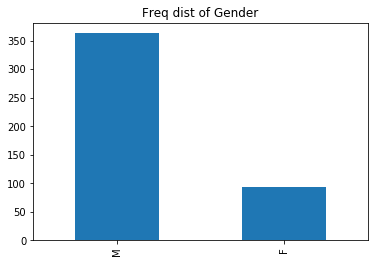

In [12]:
Congress_data['gender'].value_counts().plot.bar(title='Freq dist of Gender')

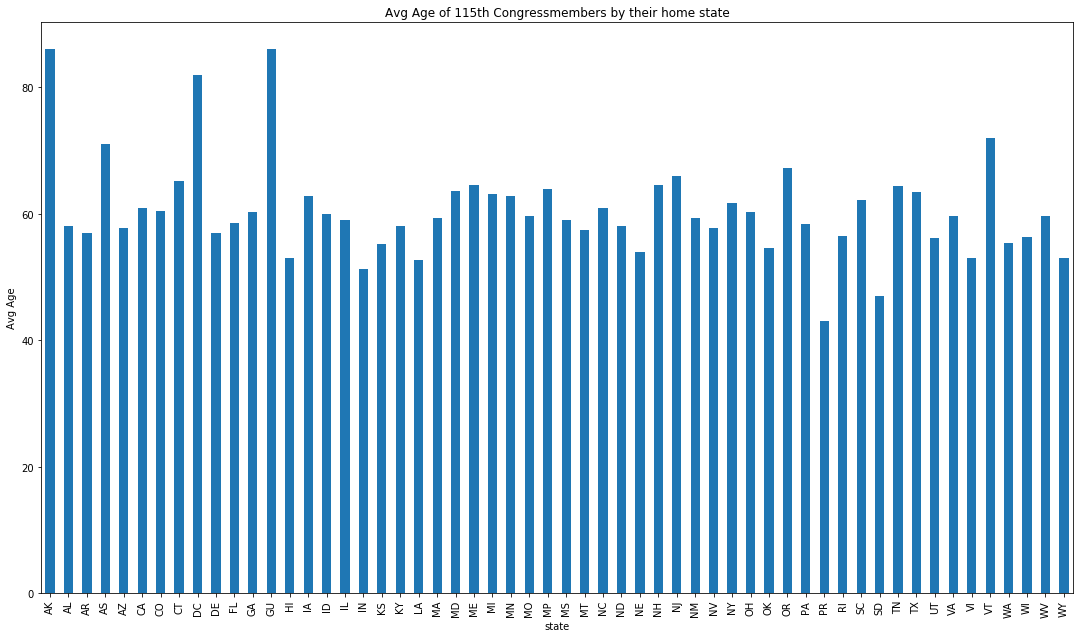

In [13]:
var = Congress_data.groupby('state').age.mean() #grouped sum of sales at Gender level
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('state')
ax1.set_ylabel('Avg Age')
ax1.set_title("Avg Age of 115th Congressmembers by their home state")
var.plot(kind='bar')

In [15]:
# Dependencies
import json
import os

# Load JSON
filepath = os.path.join("us-115th-congress-members.geojson")
with open(filepath) as jsonfile:
    congress_geojson = json.load(jsonfile)

from pprint import pprint

In [16]:
for property_name, property_value in features["properties"].items():
    # print(property_name, property_value)
    

SyntaxError: unexpected EOF while parsing (<ipython-input-16-3cdc84c6d3ba>, line 3)

In [ ]:
import bs4
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen

news_url="https://thehill.com/taxonomy/term/1131/feed"
Client=urlopen(news_url)
xml_page=Client.read()
Client.close()

soup_page=soup(xml_page,"xml")
news_list=soup_page.findAll("item")
# Print news title, url and publish date
for news in news_list:
  print(news.title.text)
  print(news.link.text)
  print(news.pubDate.text)
  print("-"*60)